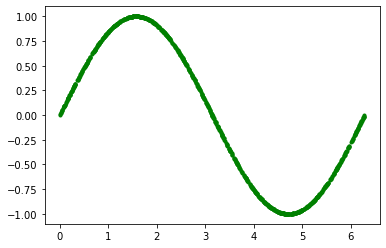

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

#데이터 샘플 생성
SAMPLE = 1000

# 실행할따마다 시드값을 지정해서 다른 랜덤값을 얻는다.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 사인파의 전폭 범위를 0~2n 내에서 균일하게 난수 집합을 생성
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLE)
# 값을 섞습니다. 순서를 따르지 않게 합니다.
np.random.shuffle(x_values)

# 사인값을 계산합니다.
y_values = np.sin(x_values)

# 데이터를 그려줍니다.
plt.plot(x_values, y_values, 'g.')
plt.show()

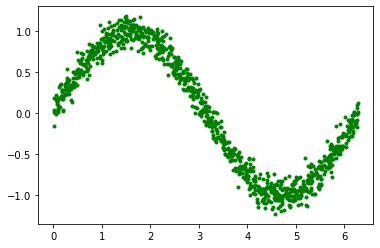

In [2]:
y_values = np.sin(x_values)
y_values += 0.1* np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'g.')
plt.show()

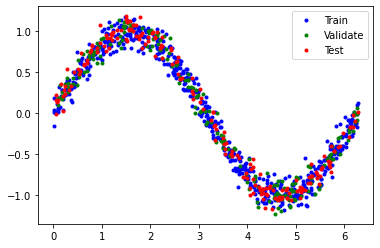

In [3]:
# 데이터 분할
# 훈련, 검증, 테스트
#  6  :  2  :  2
train_split = int(0.6 * SAMPLE)
test_split = int(0.2 * SAMPLE + train_split)

# np.split() : 두번째 인수가 중요한데, 분할 되는 인덱스 배열이며 두개의 인덱스를
# 제공하고 있기 때문에 총 3개의 덩어리로 나뉘어 집니다.
x_train, x_validate, x_test = np.split(x_values, [train_split, test_split])
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

# 분할한 데이터 원 데이터와 크기가 같은지 확인
assert(x_train.size + x_validate.size + x_test.size) == SAMPLE

# 다른 색상으로 분할된 데이터를 그래프에 표시합니다.
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'g.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [4]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

# compile인수 : 훈련 중에 네트워크가 입력을 모델링하도록 조정하는 알고리즘
# 몇가지 옵션이 있다.
# 손실 함수 : 훈련 과정에서 네트워크 예측이 실제값에서 얼마나 멀리떨어져 있는지 계산하기 위해서 사용되는 방법
# mse : 평균제곱오차법
# 숫자를 예측하는 회귀문제에서 사용됩니다.
# metrics : 모델의 성능을 판단하는데 사용되는 함수
# mae : 평균 절대 오차법
# 회귀 모형의 성능을 측정하는데 사용됩니다.
# 훈련중 측정한 결과를 훈련 후 확인할 수 있습니다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                     validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 0s 530us/sample - loss: 0.7996 - mae: 0.7858 - val_loss: 0.5934 - val_mae: 0.6939
Epoch 2/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.4950 - mae: 0.6231 - val_loss: 0.4769 - val_mae: 0.6081
Epoch 3/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.4258 - mae: 0.5694 - val_loss: 0.4315 - val_mae: 0.5692
Epoch 4/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.3908 - mae: 0.5419 - val_loss: 0.3974 - val_mae: 0.5427
Epoch 5/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.3580 - mae: 0.5168 - val_loss: 0.3653 - val_mae: 0.5240
Epoch 6/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.3291 - mae: 0.4989 - val_loss: 0.3322 - val_mae: 0.4956
Epoch 7/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.3010 - mae: 0.4771 - val_loss: 0.3036 - val_mae: 0

600/600 [==============================] - 0s 53us/sample - loss: 0.1654 - mae: 0.3385 - val_loss: 0.1672 - val_mae: 0.3407
Epoch 61/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1637 - mae: 0.3377 - val_loss: 0.1678 - val_mae: 0.3432
Epoch 62/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1642 - mae: 0.3386 - val_loss: 0.1670 - val_mae: 0.3409
Epoch 63/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.1627 - mae: 0.3356 - val_loss: 0.1677 - val_mae: 0.3429
Epoch 64/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1634 - mae: 0.3362 - val_loss: 0.1704 - val_mae: 0.3457
Epoch 65/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1639 - mae: 0.3375 - val_loss: 0.1667 - val_mae: 0.3396
Epoch 66/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1634 - mae: 0.3368 - val_loss: 0.1718 - val_mae: 0.3468
Epoch 67/1000
600/600 [=========================

600/600 [==============================] - 0s 48us/sample - loss: 0.1587 - mae: 0.3287 - val_loss: 0.1662 - val_mae: 0.3273
Epoch 120/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1589 - mae: 0.3246 - val_loss: 0.1698 - val_mae: 0.3395
Epoch 121/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1611 - mae: 0.3295 - val_loss: 0.1640 - val_mae: 0.3338
Epoch 122/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1611 - mae: 0.3297 - val_loss: 0.1633 - val_mae: 0.3297
Epoch 123/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1610 - mae: 0.3291 - val_loss: 0.1631 - val_mae: 0.3319
Epoch 124/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1610 - mae: 0.3294 - val_loss: 0.1633 - val_mae: 0.3291
Epoch 125/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1608 - mae: 0.3294 - val_loss: 0.1634 - val_mae: 0.3282
Epoch 126/1000
600/600 [==================

Epoch 178/1000
600/600 [==============================] - 0s 47us/sample - loss: 0.1578 - mae: 0.3232 - val_loss: 0.1654 - val_mae: 0.3321
Epoch 179/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1585 - mae: 0.3236 - val_loss: 0.1625 - val_mae: 0.3291
Epoch 180/1000
600/600 [==============================] - 0s 57us/sample - loss: 0.1590 - mae: 0.3249 - val_loss: 0.1616 - val_mae: 0.3274
Epoch 181/1000
600/600 [==============================] - 0s 65us/sample - loss: 0.1584 - mae: 0.3249 - val_loss: 0.1641 - val_mae: 0.3222
Epoch 182/1000
600/600 [==============================] - 0s 58us/sample - loss: 0.1586 - mae: 0.3224 - val_loss: 0.1617 - val_mae: 0.3238
Epoch 183/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1582 - mae: 0.3221 - val_loss: 0.1674 - val_mae: 0.3338
Epoch 184/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1598 - mae: 0.3255 - val_loss: 0.1613 - val_mae: 0.3263
Epoch 185/1000
600/600 [===

Epoch 237/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1569 - mae: 0.3196 - val_loss: 0.1608 - val_mae: 0.3241
Epoch 238/1000
600/600 [==============================] - 0s 57us/sample - loss: 0.1578 - mae: 0.3203 - val_loss: 0.1603 - val_mae: 0.3228
Epoch 239/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1584 - mae: 0.3204 - val_loss: 0.1617 - val_mae: 0.3250
Epoch 240/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.1569 - mae: 0.3184 - val_loss: 0.1608 - val_mae: 0.3189
Epoch 241/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1564 - mae: 0.3174 - val_loss: 0.1655 - val_mae: 0.3287
Epoch 242/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.1573 - mae: 0.3196 - val_loss: 0.1603 - val_mae: 0.3229
Epoch 243/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1570 - mae: 0.3177 - val_loss: 0.1608 - val_mae: 0.3235
Epoch 244/1000
600/600 [===

Epoch 296/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1572 - mae: 0.3170 - val_loss: 0.1593 - val_mae: 0.3190
Epoch 297/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1569 - mae: 0.3180 - val_loss: 0.1596 - val_mae: 0.3202
Epoch 298/1000
600/600 [==============================] - 0s 57us/sample - loss: 0.1564 - mae: 0.3172 - val_loss: 0.1600 - val_mae: 0.3162
Epoch 299/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1560 - mae: 0.3155 - val_loss: 0.1592 - val_mae: 0.3176
Epoch 300/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1563 - mae: 0.3160 - val_loss: 0.1594 - val_mae: 0.3190
Epoch 301/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1556 - mae: 0.3149 - val_loss: 0.1595 - val_mae: 0.3196
Epoch 302/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1559 - mae: 0.3145 - val_loss: 0.1671 - val_mae: 0.3276
Epoch 303/1000
600/600 [===

Epoch 355/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1564 - mae: 0.3151 - val_loss: 0.1594 - val_mae: 0.3147
Epoch 356/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1559 - mae: 0.3143 - val_loss: 0.1589 - val_mae: 0.3151
Epoch 357/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1557 - mae: 0.3145 - val_loss: 0.1593 - val_mae: 0.3140
Epoch 358/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1559 - mae: 0.3144 - val_loss: 0.1587 - val_mae: 0.3166
Epoch 359/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1554 - mae: 0.3141 - val_loss: 0.1587 - val_mae: 0.3166
Epoch 360/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1563 - mae: 0.3150 - val_loss: 0.1588 - val_mae: 0.3169
Epoch 361/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1555 - mae: 0.3150 - val_loss: 0.1595 - val_mae: 0.3136
Epoch 362/1000
600/600 [===

Epoch 414/1000
600/600 [==============================] - 0s 63us/sample - loss: 0.1556 - mae: 0.3124 - val_loss: 0.1601 - val_mae: 0.3184
Epoch 415/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1541 - mae: 0.3106 - val_loss: 0.1692 - val_mae: 0.3265
Epoch 416/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1560 - mae: 0.3147 - val_loss: 0.1585 - val_mae: 0.3136
Epoch 417/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1554 - mae: 0.3147 - val_loss: 0.1594 - val_mae: 0.3122
Epoch 418/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1528 - mae: 0.3128 - val_loss: 0.1605 - val_mae: 0.3113
Epoch 419/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1563 - mae: 0.3132 - val_loss: 0.1582 - val_mae: 0.3136
Epoch 420/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1552 - mae: 0.3128 - val_loss: 0.1582 - val_mae: 0.3141
Epoch 421/1000
600/600 [===

Epoch 473/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1553 - mae: 0.3119 - val_loss: 0.1588 - val_mae: 0.3156
Epoch 474/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1543 - mae: 0.3108 - val_loss: 0.1636 - val_mae: 0.3207
Epoch 475/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1561 - mae: 0.3143 - val_loss: 0.1602 - val_mae: 0.3177
Epoch 476/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1544 - mae: 0.3114 - val_loss: 0.1644 - val_mae: 0.3215
Epoch 477/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1546 - mae: 0.3109 - val_loss: 0.1586 - val_mae: 0.3108
Epoch 478/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.1556 - mae: 0.3116 - val_loss: 0.1583 - val_mae: 0.3144
Epoch 479/1000
600/600 [==============================] - 0s 47us/sample - loss: 0.1545 - mae: 0.3089 - val_loss: 0.1580 - val_mae: 0.3133
Epoch 480/1000
600/600 [===

Epoch 532/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1551 - mae: 0.3110 - val_loss: 0.1581 - val_mae: 0.3099
Epoch 533/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1553 - mae: 0.3106 - val_loss: 0.1588 - val_mae: 0.3148
Epoch 534/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1544 - mae: 0.3104 - val_loss: 0.1595 - val_mae: 0.3158
Epoch 535/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1545 - mae: 0.3109 - val_loss: 0.1579 - val_mae: 0.3109
Epoch 536/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1545 - mae: 0.3114 - val_loss: 0.1589 - val_mae: 0.3096
Epoch 537/1000
600/600 [==============================] - 0s 55us/sample - loss: 0.1549 - mae: 0.3108 - val_loss: 0.1577 - val_mae: 0.3119
Epoch 538/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1552 - mae: 0.3103 - val_loss: 0.1597 - val_mae: 0.3161
Epoch 539/1000
600/600 [===

Epoch 591/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1541 - mae: 0.3095 - val_loss: 0.1601 - val_mae: 0.3162
Epoch 592/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1538 - mae: 0.3100 - val_loss: 0.1609 - val_mae: 0.3173
Epoch 593/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1538 - mae: 0.3095 - val_loss: 0.1590 - val_mae: 0.3151
Epoch 594/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1553 - mae: 0.3117 - val_loss: 0.1577 - val_mae: 0.3108
Epoch 595/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1550 - mae: 0.3105 - val_loss: 0.1583 - val_mae: 0.3137
Epoch 596/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1550 - mae: 0.3082 - val_loss: 0.1603 - val_mae: 0.3160
Epoch 597/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1550 - mae: 0.3098 - val_loss: 0.1576 - val_mae: 0.3106
Epoch 598/1000
600/600 [===

Epoch 650/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1547 - mae: 0.3107 - val_loss: 0.1577 - val_mae: 0.3121
Epoch 651/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1534 - mae: 0.3086 - val_loss: 0.1645 - val_mae: 0.3199
Epoch 652/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1552 - mae: 0.3102 - val_loss: 0.1619 - val_mae: 0.3173
Epoch 653/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1539 - mae: 0.3102 - val_loss: 0.1584 - val_mae: 0.3084
Epoch 654/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1544 - mae: 0.3097 - val_loss: 0.1577 - val_mae: 0.3097
Epoch 655/1000
600/600 [==============================] - 0s 53us/sample - loss: 0.1545 - mae: 0.3099 - val_loss: 0.1588 - val_mae: 0.3080
Epoch 656/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1543 - mae: 0.3090 - val_loss: 0.1577 - val_mae: 0.3117
Epoch 657/1000
600/600 [===

Epoch 709/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1529 - mae: 0.3077 - val_loss: 0.1588 - val_mae: 0.3138
Epoch 710/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1543 - mae: 0.3095 - val_loss: 0.1615 - val_mae: 0.3166
Epoch 711/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1543 - mae: 0.3083 - val_loss: 0.1580 - val_mae: 0.3124
Epoch 712/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1534 - mae: 0.3073 - val_loss: 0.1580 - val_mae: 0.3084
Epoch 713/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1541 - mae: 0.3074 - val_loss: 0.1617 - val_mae: 0.3165
Epoch 714/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1553 - mae: 0.3095 - val_loss: 0.1574 - val_mae: 0.3096
Epoch 715/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1549 - mae: 0.3091 - val_loss: 0.1575 - val_mae: 0.3110
Epoch 716/1000
600/600 [===

Epoch 768/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1547 - mae: 0.3081 - val_loss: 0.1586 - val_mae: 0.3129
Epoch 769/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1536 - mae: 0.3068 - val_loss: 0.1575 - val_mae: 0.3108
Epoch 770/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1541 - mae: 0.3079 - val_loss: 0.1574 - val_mae: 0.3091
Epoch 771/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1541 - mae: 0.3070 - val_loss: 0.1581 - val_mae: 0.3122
Epoch 772/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1539 - mae: 0.3075 - val_loss: 0.1575 - val_mae: 0.3105
Epoch 773/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1541 - mae: 0.3081 - val_loss: 0.1578 - val_mae: 0.3083
Epoch 774/1000
600/600 [==============================] - 0s 47us/sample - loss: 0.1511 - mae: 0.3060 - val_loss: 0.1647 - val_mae: 0.3055
Epoch 775/1000
600/600 [===

Epoch 827/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1544 - mae: 0.3092 - val_loss: 0.1578 - val_mae: 0.3079
Epoch 828/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1543 - mae: 0.3079 - val_loss: 0.1574 - val_mae: 0.3099
Epoch 829/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1544 - mae: 0.3078 - val_loss: 0.1574 - val_mae: 0.3099
Epoch 830/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1542 - mae: 0.3063 - val_loss: 0.1577 - val_mae: 0.3112
Epoch 831/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1539 - mae: 0.3077 - val_loss: 0.1576 - val_mae: 0.3110
Epoch 832/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1528 - mae: 0.3059 - val_loss: 0.1574 - val_mae: 0.3089
Epoch 833/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1546 - mae: 0.3067 - val_loss: 0.1580 - val_mae: 0.3075
Epoch 834/1000
600/600 [===

Epoch 886/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1533 - mae: 0.3068 - val_loss: 0.1574 - val_mae: 0.3079
Epoch 887/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1517 - mae: 0.3042 - val_loss: 0.1591 - val_mae: 0.3058
Epoch 888/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1564 - mae: 0.3084 - val_loss: 0.1575 - val_mae: 0.3066
Epoch 889/1000
600/600 [==============================] - 0s 47us/sample - loss: 0.1528 - mae: 0.3057 - val_loss: 0.1576 - val_mae: 0.3067
Epoch 890/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1546 - mae: 0.3057 - val_loss: 0.1572 - val_mae: 0.3086
Epoch 891/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1551 - mae: 0.3084 - val_loss: 0.1576 - val_mae: 0.3070
Epoch 892/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1548 - mae: 0.3076 - val_loss: 0.1581 - val_mae: 0.3115
Epoch 893/1000
600/600 [===

Epoch 945/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1534 - mae: 0.3084 - val_loss: 0.1652 - val_mae: 0.3048
Epoch 946/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1551 - mae: 0.3075 - val_loss: 0.1580 - val_mae: 0.3111
Epoch 947/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1550 - mae: 0.3079 - val_loss: 0.1578 - val_mae: 0.3108
Epoch 948/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1547 - mae: 0.3083 - val_loss: 0.1578 - val_mae: 0.3071
Epoch 949/1000
600/600 [==============================] - 0s 50us/sample - loss: 0.1544 - mae: 0.3067 - val_loss: 0.1574 - val_mae: 0.3098
Epoch 950/1000
600/600 [==============================] - 0s 48us/sample - loss: 0.1537 - mae: 0.3073 - val_loss: 0.1585 - val_mae: 0.3119
Epoch 951/1000
600/600 [==============================] - 0s 52us/sample - loss: 0.1543 - mae: 0.3087 - val_loss: 0.1576 - val_mae: 0.3077
Epoch 952/1000
600/600 [===

In [6]:
#x_train, y_train : fit()에 대한 처음 두 가지 인수는 훈련 데이터 x, y입니다.
# 데이터 일부는 검증과 테스를 위해 따로 보관함으로
# 훈련 데이터셋만 네트워크 훈련에 사용됩니다.

# epochs : 전체 훈련 데이터셋이 훈련 중 네트워크를 통해 몇번 실행될것인지 지정합니다.
# 에폭이 클경우 학습을 더 많이 합니다.
# 학습을 더 많이 할 수록 네트워크가 더 좋아지지 않을 수도 있다.
# [과적합]이 걸릴 수도 있다.

# batch_size : 배치 크기는 정확도를 측정하고 가중치와 편향을 업데이트
# 하기 전에 네트워크게 공급할 훈련 데이터 수를 지정합니다.
# 데이터를 추론을 실행하고 총 손실을 계산, 배치당 한 번 네트워크를 업데이트
# 훈련 효율성, 정확성이 올라갑니다.
# 보통 배치 크기는 16 또는 32를 하는 것이 보편적입니다.

# validation_data : 검증 데이터를 지정하는 인수입니다.
# 훈련과정을 마친 네트워크게 투입되어서 네트워크의 예측값과 기대 출력값을 비교할 수 있다.


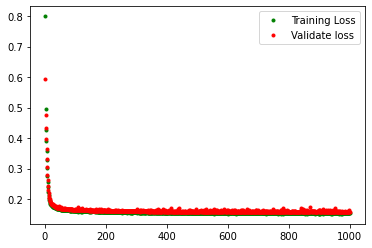

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training Loss')
plt.plot(epochs, val_loss, 'r.', label="Validate loss")
plt.legend()
plt.show()

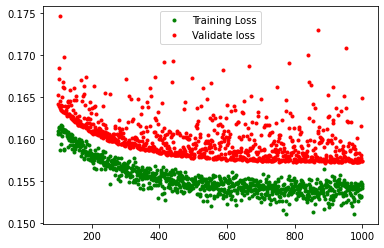

In [8]:
skip=100
plt.plot(epochs[skip:], loss[skip:], 'g.', label='Training Loss')
plt.plot(epochs[skip:], val_loss[skip:], 'r.', label="Validate loss")
plt.legend()
plt.show()

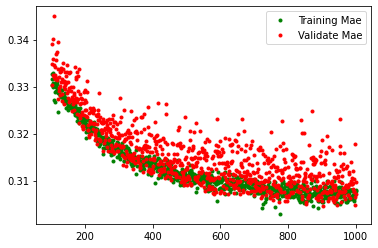

In [10]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.plot(epochs[skip:], mae[skip:], 'g.', label='Training Mae')
plt.plot(epochs[skip:], val_mae[skip:], 'r.', label="Validate Mae")
plt.legend()
plt.show()

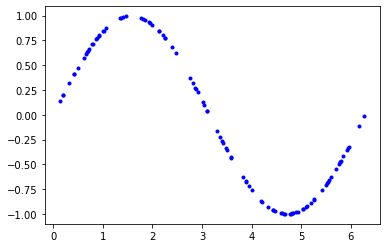

In [15]:
sample = 100

seed = 130
np.random.seed(seed)
tf.random.set_seed(seed)

x_values = np.random.uniform(low=0, high=2*math.pi, size=sample)
np.random.shuffle(x_values)

y_values = np.sin(x_values)

x_predict = 

plt.plot(x_values, y_values, 'b.', label="Actual")
plt.plot()
plt.show()

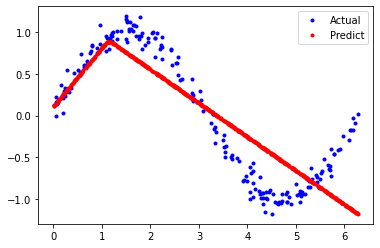

In [19]:
predictions = model_1.predict(x_train)

plt.clf()
plt.plot(x_test, y_test, 'b.', label="Actual")
plt.plot(x_train, predictions, 'r.', label="Predict")
plt.legend()
plt.show()